## Исследование таргетов

#### Здесь мы препроцессим данные, чтобы могли построить распределение кислот и поисследовать их.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10

#здесь файлик нужно сделать из сводной таблицы
df = pd.read_excel("../data/fats.xlsx")

def clean_value(x):
    if isinstance(x, str):
        if '<0,05' in x or '<0,05' in x:
            return 0.025 
        elif 'н/д' in x or '-' in x:
            return np.nan
    return x

df_clean = df.applymap(clean_value)

for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')



### __Распределение жирных кислот__

#### __Наши жирные кислоты__:

##### - Лауриновая (C12:0) — короткоцепочечная насыщенная кислота, синтезируется в вымени; повышает твердость жира и имеет антимикробные свойства.
#####    - Пальмитиновая (C16:0) — основная насыщенная кислота молочного жира; влияет на энергетическую плотность и температуру плавления.
#####   - Стеариновая (C18:0) — длинноцепочечная насыщенная кислота; образуется частично из рациона, придаёт жиру плотность и устойчивость к окислению.
#####    - Олеиновая (C18:1) — мононенасыщенная; повышает текучесть и мягкость жира, отражает активность обмена в рубце.
#####    - Линолевая (C18:2) — полиненасыщенная омега-6; поступает из корма, влияет на вкус и окислительную стабильность молока.
   ##### - Линоленовая (C18:3) — полиненасыщенная омега-3; отражает качество кормов, особенно зелёных, повышает биологическую ценность жира.

#### мы исследуем жирные кислоты, чтобы посмотреть на то, есть ли смещенность в распределениях, насколько в среднем отклоняются от среднего величины 

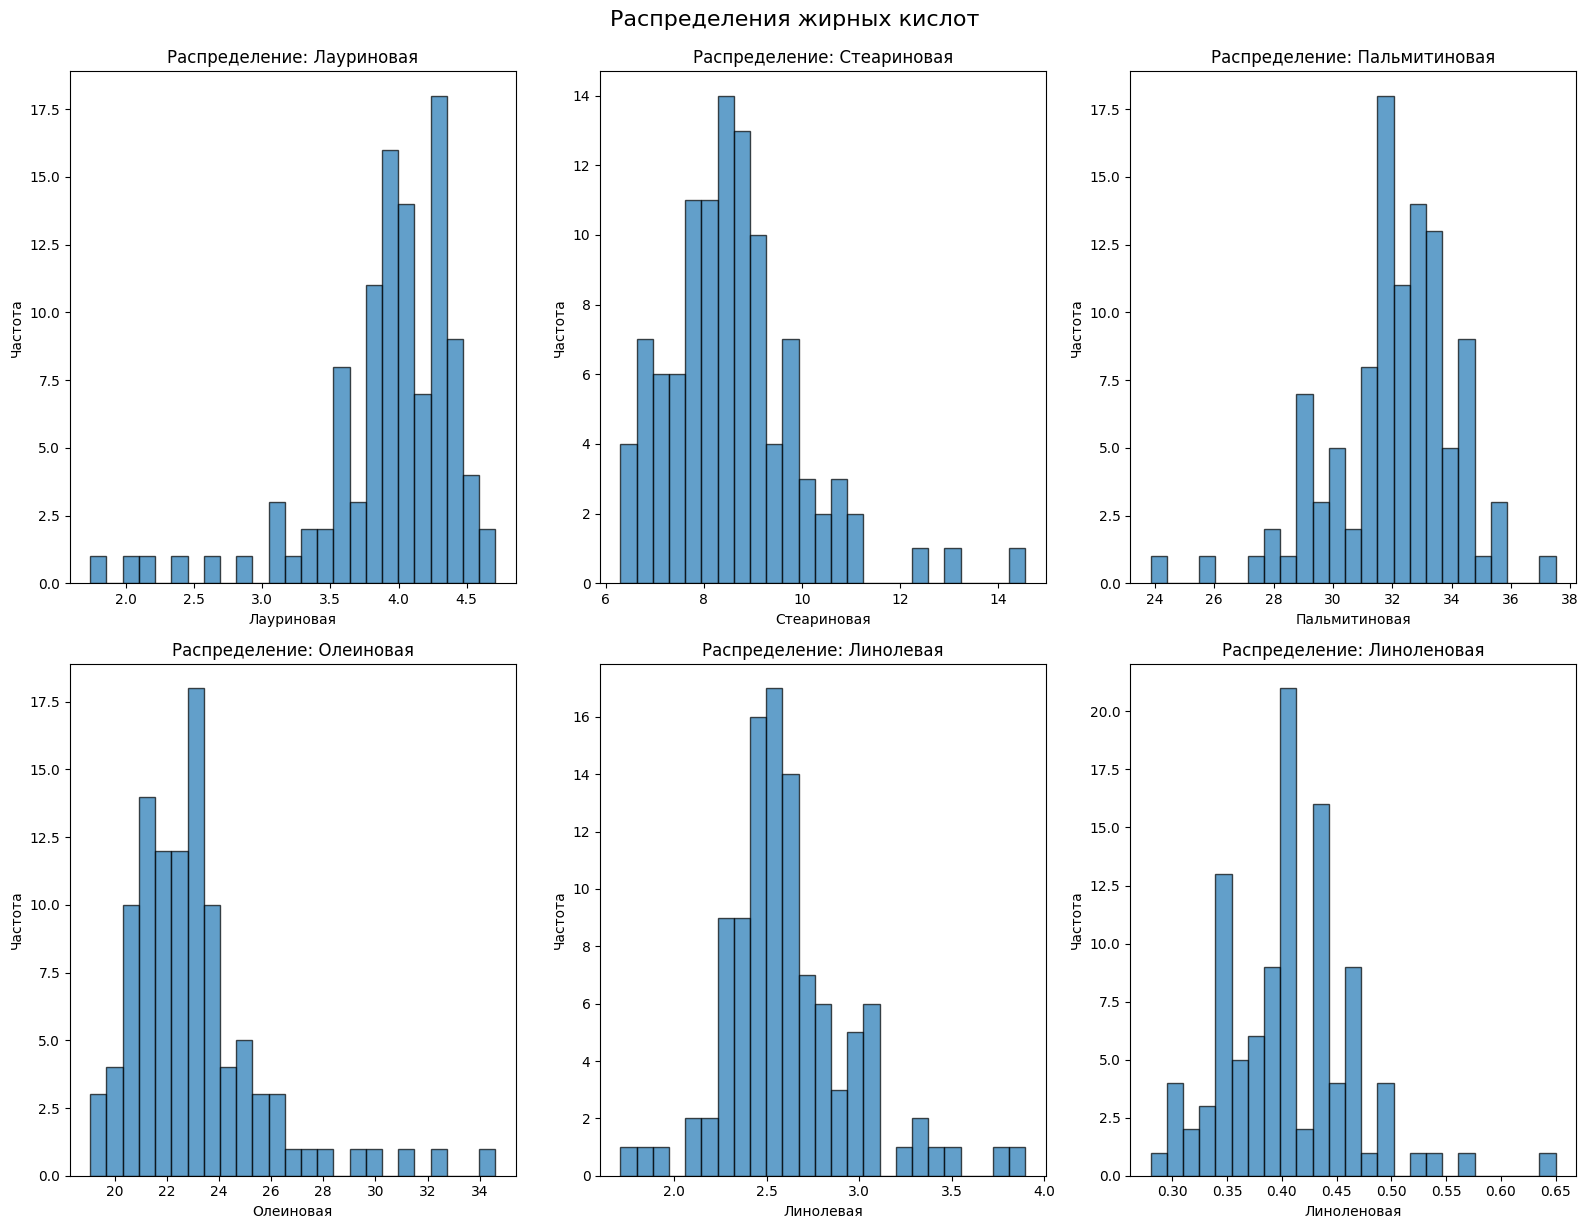

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
axes = axes.ravel()
columns = ['Лауриновая',  'Стеариновая','Пальмитиновая','Олеиновая',  'Линолевая' ,'Линоленовая']
for i, column in enumerate(columns):
    axes[i].hist(df_clean[column].dropna(), bins=25, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Распределение: {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.suptitle('Распределения жирных кислот', y=1.02, fontsize=16)
plt.show()


#### По распределениям можно сказать, что почти все кислоты распределены околонормально, есть левосторонние/правосторонние ассиметрии. 

По симметрии мы можем сказать, что это не выбросы и не патологии, а обычная неоднородность стада

Если распределение правостороннее (хвост вправо) — есть несколько образцов с повышенными концентрациями. Это может означать:
- у части коров усилен синтез или поступление жиров из рациона (например, более жирные корма или активный липолиз);
- индивидуальные различия в метаболизме — кто-то интенсивнее превращает углеводы в жир.

Если распределение левостороннее (хвост влево) — есть коровы с пониженным содержанием соответствующей кислоты. Это может говорить о:
- снижении активности синтеза жиров (стресс, энергетический дефицит);
- большом поступлении жира извне, из-за чего синтез коротких кислот подавляется.


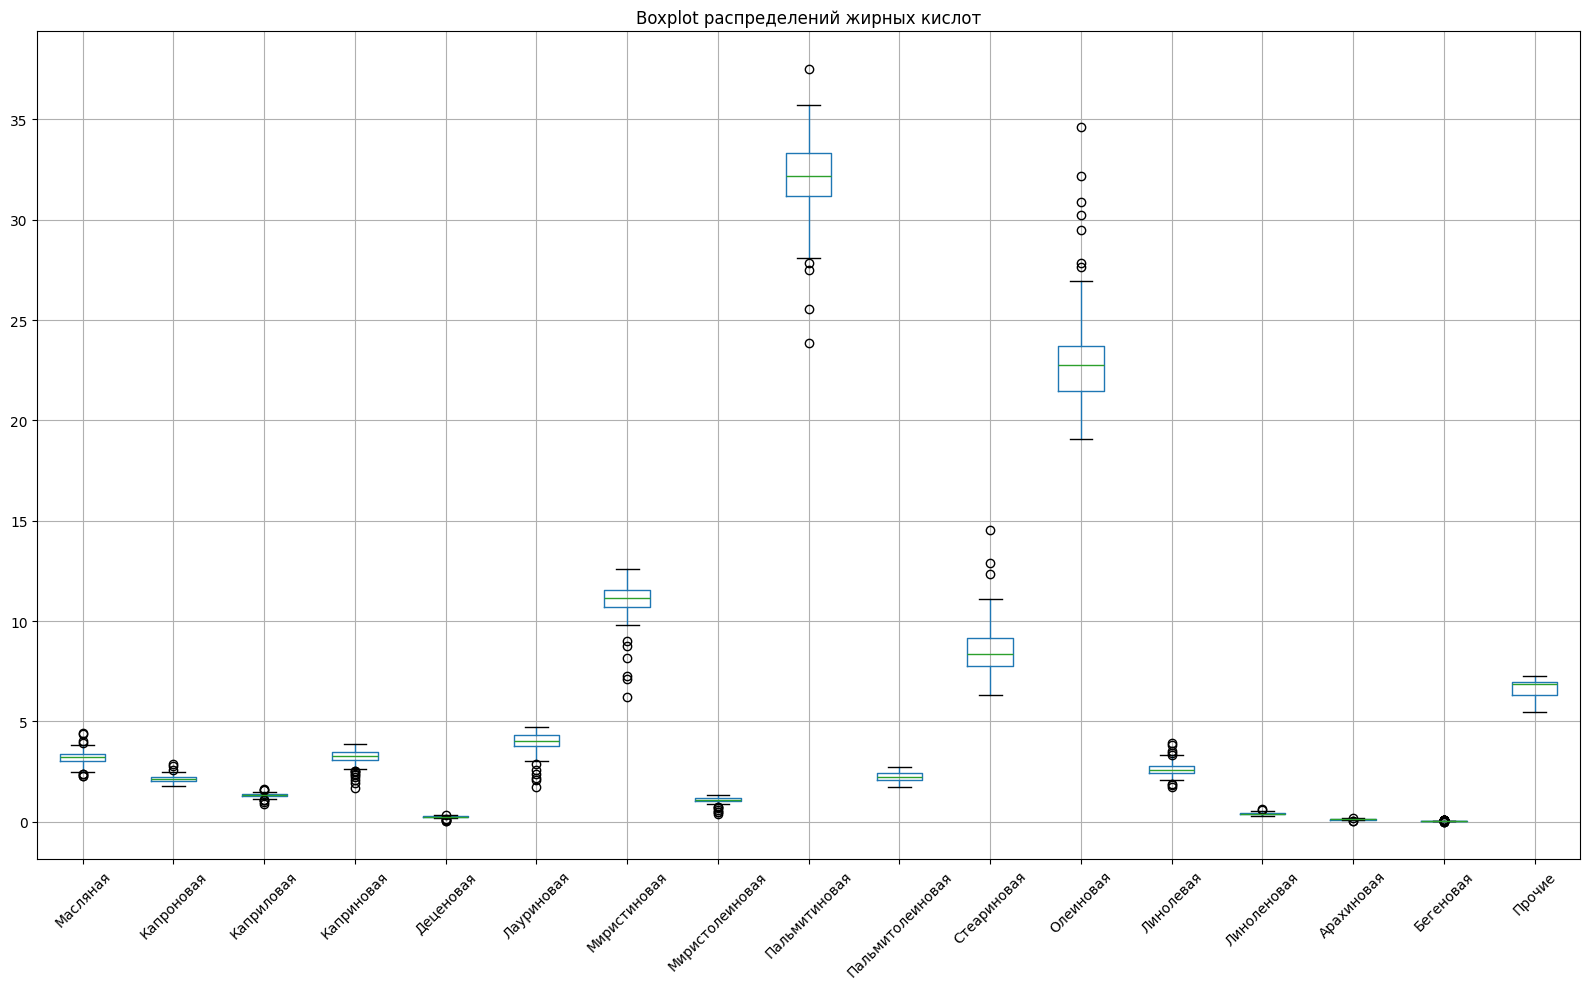

In [7]:

plt.figure(figsize=(16, 10))
df_clean.boxplot(rot=45)
plt.title('Boxplot распределений жирных кислот')
plt.tight_layout()
plt.show()

тут можно видеть, что почти для всех есть выбросы, но это просто обусловлено маленьким размером обучающей выборки, поэтому их не стоит чистить.

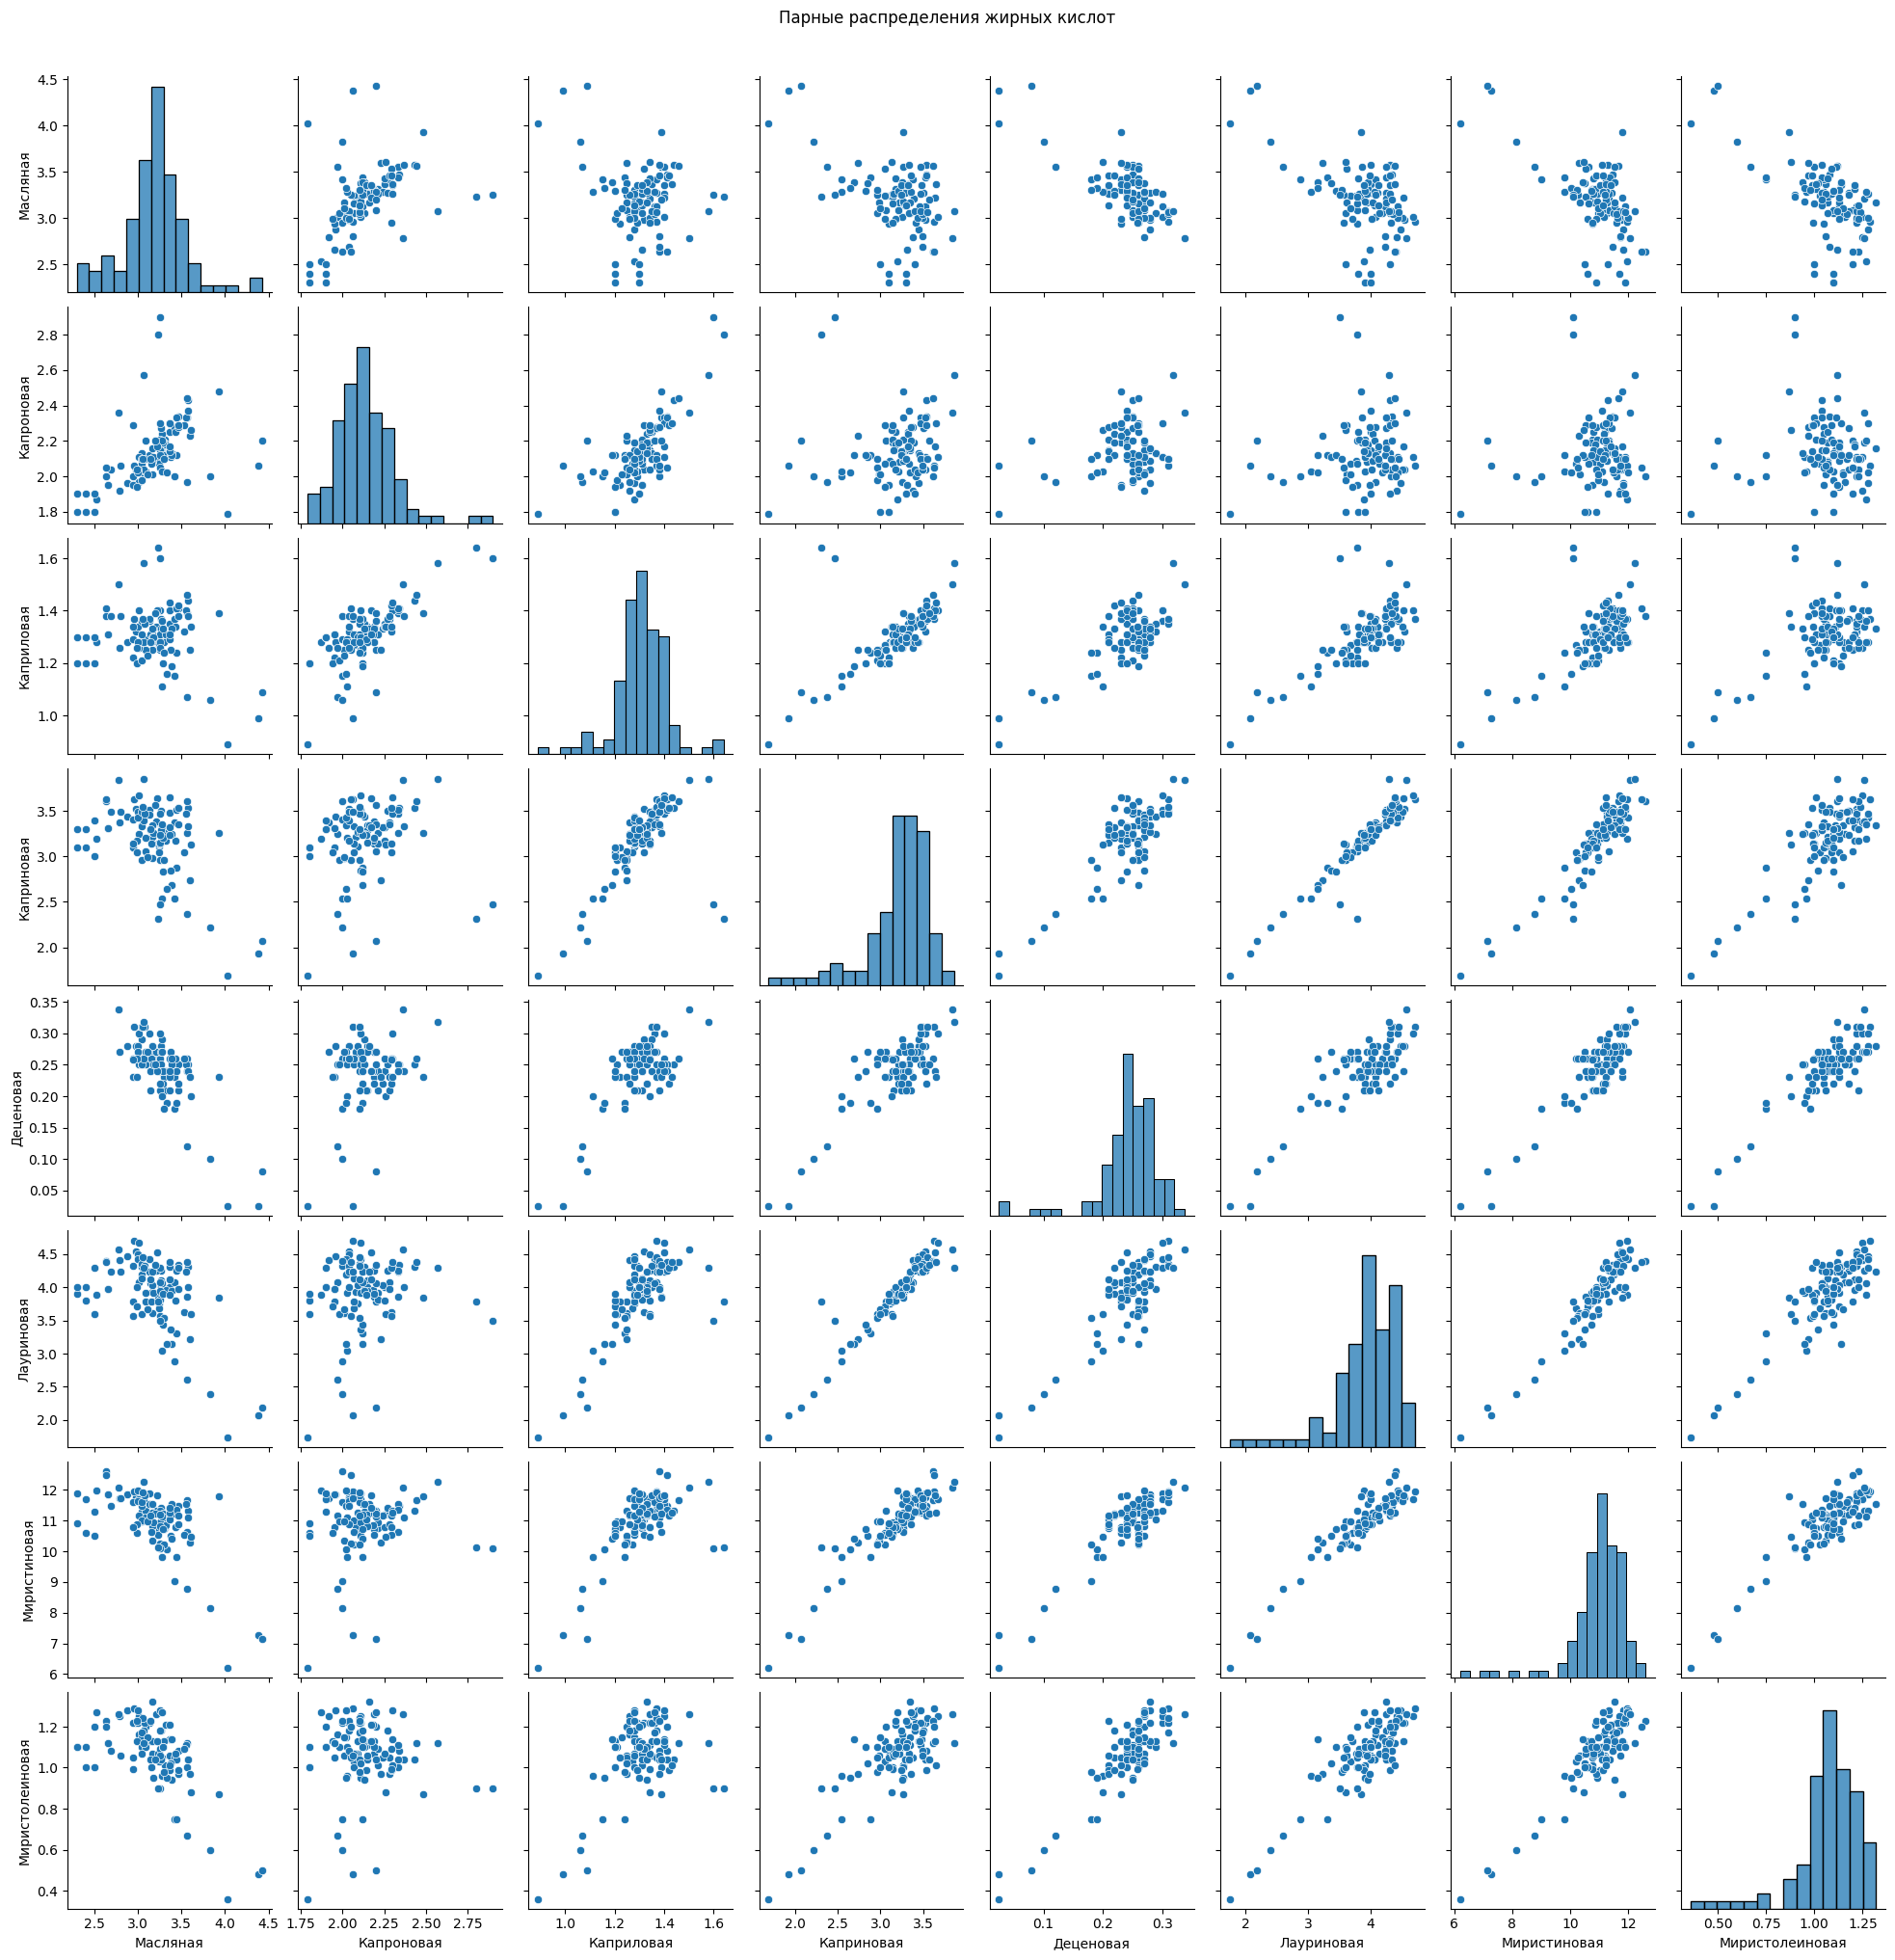

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df_clean.iloc[:, :8])
plt.suptitle('Парные распределения жирных кислот', y=1.02)
plt.show()

#### По этим пейр плотам можно видеть, что большинство жирных кислот имеют линейную зависимость, поэтому их увеличение/уменьшение связано пропорционально

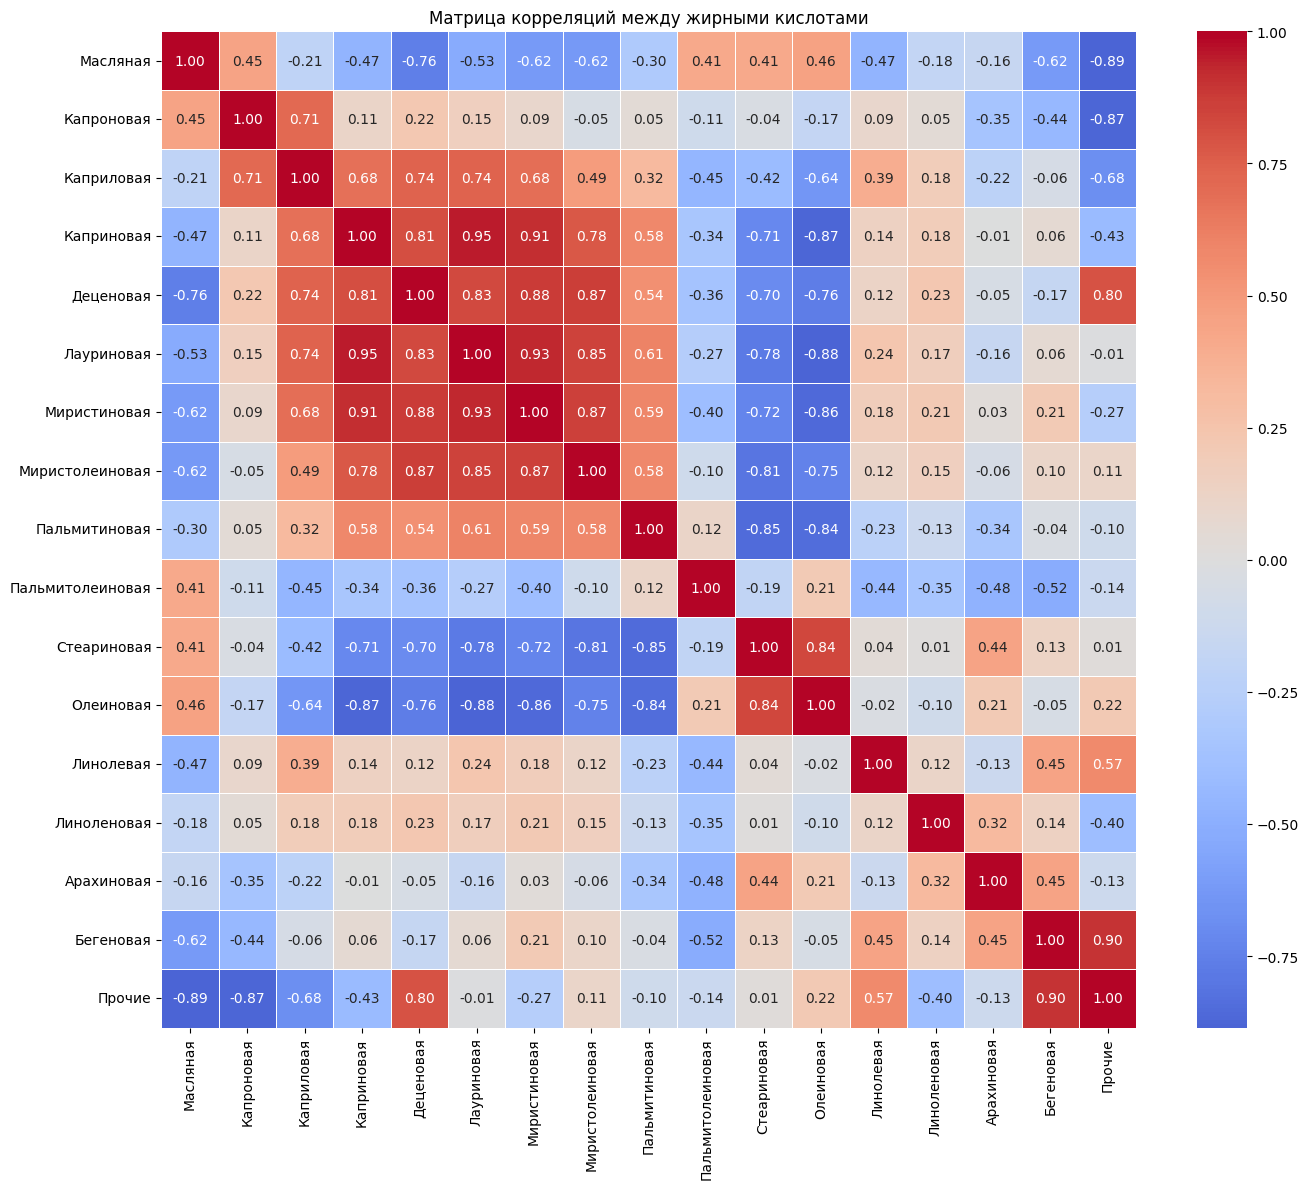

In [9]:
plt.figure(figsize=(14, 12))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций между жирными кислотами')
plt.tight_layout()
plt.show()

#### По матрице корелляций также можно наблюдать линейные(прямые и обратные) зависимости между кислотами

In [ ]:
print("\nдоп анализ")

variability = df_clean.std().sort_values(ascending=False)
print("Наиболее изменчивые жирные кислоты (по стандартному отклонению):")
print(variability.head(10))


доп анализ
Наиболее изменчивые жирные кислоты (по стандартному отклонению):
Олеиновая           2.599184
Пальмитиновая       2.105793
Стеариновая         1.371970
Миристиновая        0.999143
Прочие              0.643079
Лауриновая          0.528392
Каприновая          0.380176
Масляная            0.362471
Линолевая           0.351727
Пальмитолеиновая    0.217654
dtype: float64


#### ЗДЕСЬ нужно обратить внимание на то, что Олеиновая кислота имеет наибольший средний разброс данных, что сказывается на дальнейшей регрессии. 